<a href="https://colab.research.google.com/github/FGalvao77/Machine-Learning/blob/main/Oficina_02_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importando as bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Importando a base de dados para o google colab
 - utilizando a biblioteca fornecida pela google

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


### Leitura dos dados

In [3]:
# realizando a leitura do conjunto de dados
df = pd.read_csv('Mall_Customers.csv')
df.head() # visualizando as 5 primeiras linhas

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Quantidade de linhas e colunas

In [4]:
df.shape

(200, 5)

### Verificar dados nulos

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Informações estatísticas

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Gerando gráfico da idade versus score do cliente

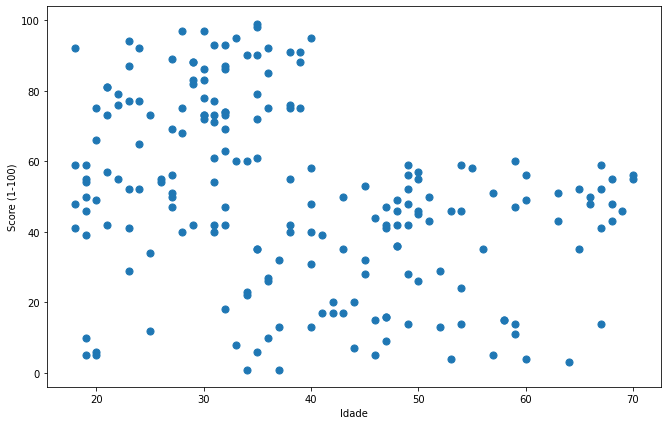

In [9]:
plt.figure(figsize=(11,7)) 
plt.scatter(df['Age'], df['Spending Score (1-100)'], s=50)
plt.xlabel('Idade')
plt.ylabel('Score (1-100)')
plt.show()

### Agora é sua vez de praticar

selecione os dados de 'Age' e 'Spending Score (1-100)' no dataframe para realizar o agrupamento com kmeans

In [10]:
# selecione no dataframe df as colunas Age e Spending Score (1-100)

# selecionando os dados para agrupamento e instanciando na variável "X"
X = df[['Age',
        'Spending Score (1-100)']]
X.head()  # visualizando as 5 primeiras linhas

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


### Clusterizando com k = 5

In [12]:
# escreva aqui em baixo o código para fazer a clusterização

# instanciando o KMeans e seus argumentos
modelo_kmeans = KMeans(n_clusters=5,
                       init='k-means++')

In [14]:
# aplicando o modelo nos dados da variável "X"
y_kmeans = modelo_kmeans.fit_predict(X)

In [44]:
# visualizando os resultados guardados na variável "y_kmeans" da iteração do modelo
y_kmeans

array([3, 1, 4, 1, 3, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2, 3, 2, 1, 2, 1,
       4, 1, 4, 1, 2, 3, 2, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2, 1, 0, 1, 2, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 2, 2, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       2, 0, 3, 3, 0, 2, 0, 0, 0, 3, 2, 2, 3, 2, 0, 3, 0, 2, 3, 2, 0, 3,
       3, 2, 0, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 2, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 2, 3, 3, 3, 0, 0, 2, 0, 3, 2, 3, 1, 3, 1, 2, 1, 4, 1, 4, 1,
       3, 1, 4, 1, 4, 1, 4, 1, 4, 1, 3, 1, 4, 1, 2, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 2, 1, 4, 1, 2, 1, 4, 1, 2, 3, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 2, 1, 4, 1, 2, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2, 1,
       4, 1], dtype=int32)

> Perceba que, foi organizado um array. 
  - e são exibidos os números `0, 1, 2, 3 e 4`, com cinco grupos ou cinco clusters.

In [61]:
# visualizando total de elementos por clusters
print(f''' Total de elementos em cada cluster:
\t-Cluster 1: {X[y_kmeans == 0].value_counts().count()}
\t-Cluster 2: {X[y_kmeans == 1].value_counts().count()}
\t-Cluster 3: {X[y_kmeans == 2].value_counts().count()}
\t-Cluster 4: {X[y_kmeans == 3].value_counts().count()}
\t-Cluster 5: {X[y_kmeans == 4].value_counts().count()}
''')

 Total de elementos em cada cluster:
	-Cluster 1: 30
	-Cluster 2: 53
	-Cluster 3: 32
	-Cluster 4: 40
	-Cluster 5: 37



### Plot um gráfico com todos os grupos

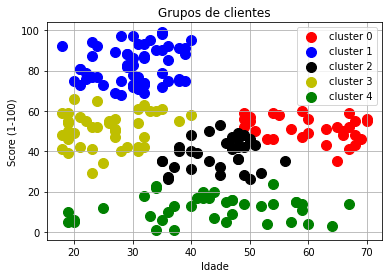

In [65]:
# escreva aqui o código para plotar o gráfico

# criando um laço de repetição "for"
k_grupos = 5
cores = ['r', 'b', 'k', 'y', 'g']
for k in range(k_grupos):
  cluster = X[y_kmeans == k]
  plt.scatter(cluster['Age'],
              cluster['Spending Score (1-100)'],
              s = 100, c = cores[k], 
              label = f'cluster {k}')
  
'''
Instanciando o gráfico, segue as linhas de código “plt.title('Grupos
de clientes')” para o título do gráfico, e “plt.xlabel('Idade”,
“plt.ylabel('Score (1-100)')” para os títulos do eixo x e y, 
assim como “plt.legend()” para a legenda; e, por fim, “plt.show()”.
'''

# visualizando graficamente os grupos criados
plt.title('Grupos de clientes')
plt.xlabel('Idade')
plt.ylabel('Score (1-100)')
plt.grid()
plt.legend()
plt.show();

> Perceba que, temos dois grupos de clientes (cluster 1 e cluster 3), respectivamente nas cores azul e amarelo, com score aproximado de 30 à 100.
  - tanto cluster 1 e 3, possui uma mesma faixa de idade que vai de um pouco mais de 20 até 40 anos.

> Já os clusters 0 e 2, com suas respectivas cores vermelho e preto, possui um score intermediário de mais ou menos de 25 à 60.
  - com idades entre 35 à 70 anos.

> O cluster 4 (verde), possui um score relativamente baixo.
  - e com faixas de idades bem diluída, que vai de um pouco menos de 20 até próximo a 70 anos.